In [1]:
import os
import pandas as pd

In [2]:
files = os.listdir("../visualization-widgets-data")
excel_files = [file for file in files if file[-5:] == ".xlsx"]

In [3]:
dfs = {}

for file in excel_files:
    dfs[file] = pd.read_excel("../visualization-widgets-data/"+file)

In [4]:
dfs

{'Eva.xlsx':        Datum  Anzahl an Anrufen  Anzahl an Verkäufen
 0 2018-04-05                 49                   12
 1 2018-04-06                 48                   14
 2 2018-04-09                 43                   15
 3 2018-04-10                 47                   18
 4 2018-04-11                 48                   30
 5 2018-04-12                 59                   15
 6 2018-04-13                 49                   19,
 'Jan.xlsx':        Datum  Anzahl an Anrufen  Anzahl an Verkäufen
 0 2018-04-05                 40                   10
 1 2018-04-06                 43                   15
 2 2018-04-09                 33                   12
 3 2018-04-10                 43                   10
 4 2018-04-11                 23                   20
 5 2018-04-12                 44                   12
 6 2018-04-13                 56                   20,
 'Marie.xlsx':        Datum  Anzahl an Anrufen  Anzahl an Verkäufen
 0 2018-04-05                 40          

In [5]:
from datetime import date

d={}
for filename, df in dfs.items():
    for index, row in df.iterrows():
        date_col = row["Datum"].date()
        if not date_col in d:
            d[date_col] = {}
        d[date_col][filename]={
            "calls":row["Anzahl an Anrufen"],
            "sales": row["Anzahl an Verkäufen"]
        }
d

{datetime.date(2018, 4, 5): {'Eva.xlsx': {'calls': 49, 'sales': 12},
  'Jan.xlsx': {'calls': 40, 'sales': 10},
  'Marie.xlsx': {'calls': 40, 'sales': 15},
  'Tobias.xlsx': {'calls': 41, 'sales': 15}},
 datetime.date(2018, 4, 6): {'Eva.xlsx': {'calls': 48, 'sales': 14},
  'Jan.xlsx': {'calls': 43, 'sales': 15},
  'Marie.xlsx': {'calls': 49, 'sales': 14},
  'Tobias.xlsx': {'calls': 49, 'sales': 14}},
 datetime.date(2018, 4, 9): {'Eva.xlsx': {'calls': 43, 'sales': 15},
  'Jan.xlsx': {'calls': 33, 'sales': 12},
  'Marie.xlsx': {'calls': 38, 'sales': 17},
  'Tobias.xlsx': {'calls': 42, 'sales': 18}},
 datetime.date(2018, 4, 10): {'Eva.xlsx': {'calls': 47, 'sales': 18},
  'Jan.xlsx': {'calls': 43, 'sales': 10},
  'Marie.xlsx': {'calls': 49, 'sales': 10},
  'Tobias.xlsx': {'calls': 38, 'sales': 13}},
 datetime.date(2018, 4, 11): {'Eva.xlsx': {'calls': 48, 'sales': 30},
  'Jan.xlsx': {'calls': 23, 'sales': 20},
  'Tobias.xlsx': {'calls': 55, 'sales': 12}},
 datetime.date(2018, 4, 12): {'Eva.xl

In [6]:
x=[]
#x=[excel_date for excel_date, values in sorted(d.items())]
y=[]

for excel_date, values in sorted(d.items()):
    x.append(excel_date)
    y.append(values[files[0]]["calls"])
    
print(x)
print(y)

[datetime.date(2018, 4, 5), datetime.date(2018, 4, 6), datetime.date(2018, 4, 9), datetime.date(2018, 4, 10), datetime.date(2018, 4, 11), datetime.date(2018, 4, 12), datetime.date(2018, 4, 13)]
[49, 48, 43, 47, 48, 59, 49]


C:\ProgramData\Anaconda3\lib\site-packages\pandas\plotting\_converter.py:129: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


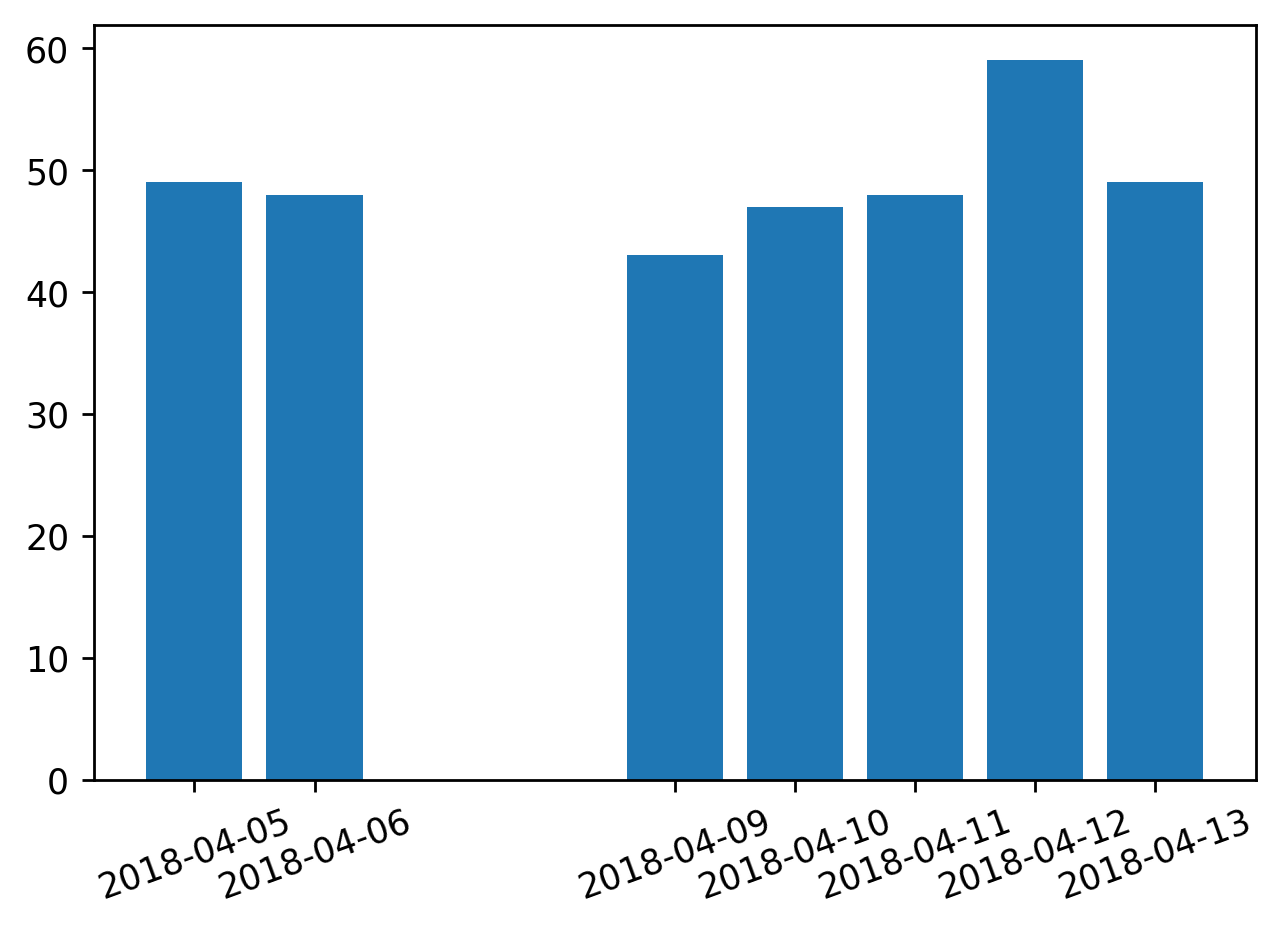

In [7]:
%matplotlib inline

import matplotlib.pyplot as plt
import seaborn as sns

fig, ax = plt.subplots()
fig.dpi = 250

ax.bar(x,y)
ax.set_xticks(x)
ax.set_xticklabels(x, rotation=20)

plt.show()

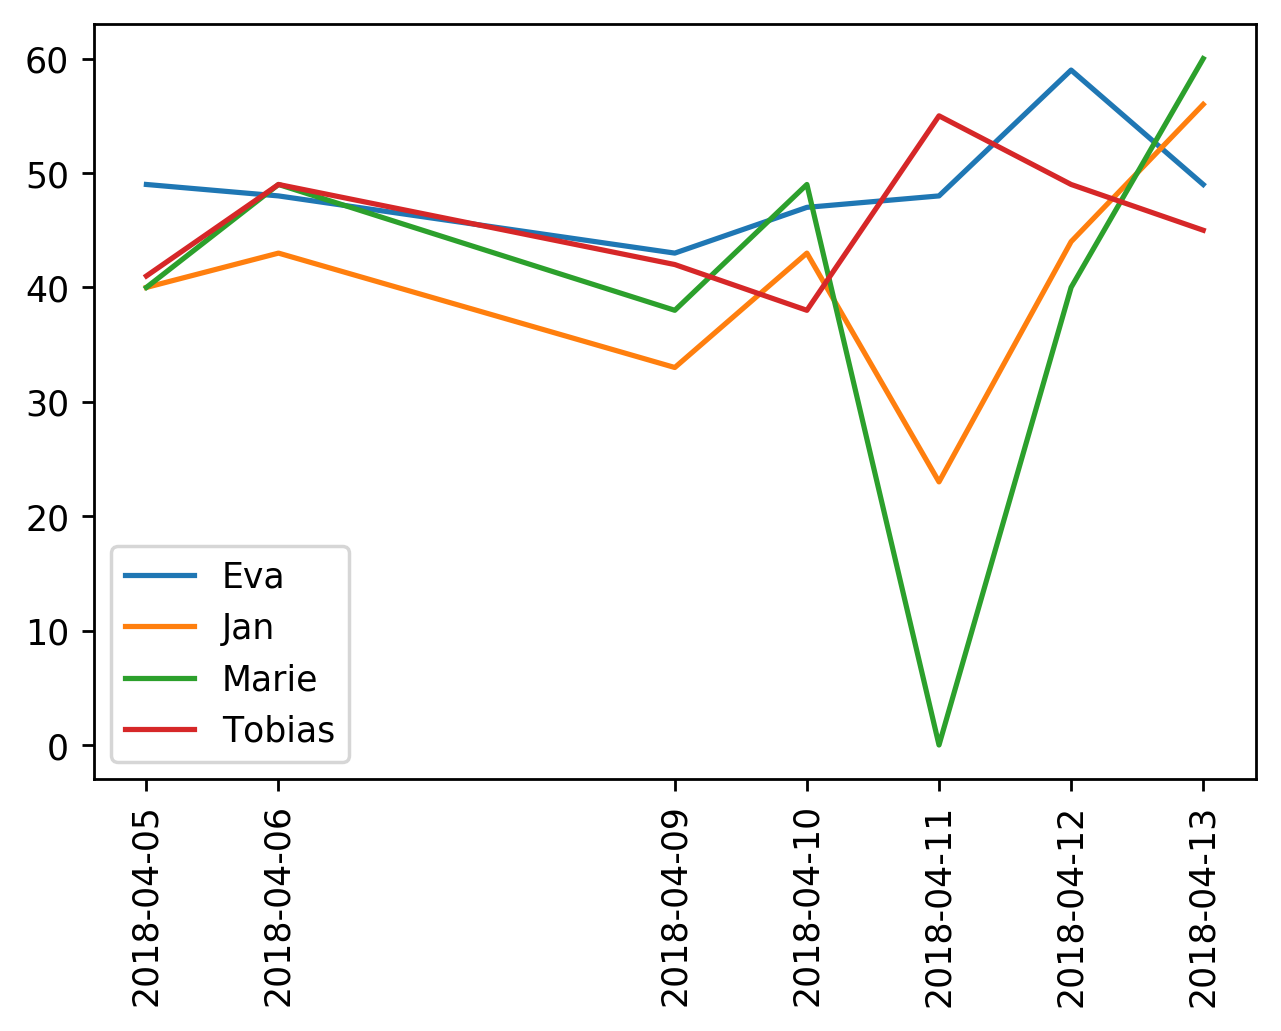

In [8]:
fig, ax = plt.subplots()
fig.dpi = 250

for filename in files:
    y=[]
    for excel_date, values in sorted(d.items()):
        calls=0
        if filename in values:
            calls = values[filename]["calls"]
        y.append(calls)
    ax.plot(x,y, label=filename[:-5])

ax.legend()
ax.set_xticks(x)
ax.set_xticklabels(x, rotation=90)
plt.show()

In [9]:
import ipywidgets as widgets
from IPython.display import display, clear_output


cbs = {}
for filename, df in dfs.items():
    cb = widgets.Checkbox(
        value=True,
        description=filename[:-5]
    )
    
    cbs[filename] = cb
    
    display(cb)
    
button = widgets.Button(description="Aktualisieren")
display(button)

def run_plot(filenames):
    for filename, df in dfs.items():
        if filename in filenames:
            cb = widgets.Checkbox(
                value=True,
                description=filename[:-5]
            )
        else:
            cb = widgets.Checkbox(
                value=False,
                description=filename[:-5]
            )

        cbs[filename] = cb

        display(cb)
    display(button)
    
    fig, ax = plt.subplots()
    fig.dpi = 250
    
    x = [excel_date for excel_date, values in sorted(d.items())]
    
    for filename in filenames:
        y=[]
        for excel_date, values in sorted(d.items()):
            calls=0
            if filename in values:
                calls = values[filename]["calls"]
            y.append(calls)
            
        ax.plot(x,y, label=filename[:-5])

    ax.legend()
    ax.set_xticks(x)
    ax.set_xticklabels(x, rotation=90)
    
    plt.show()

def on_button_click(s):
    clear_output()
    
    filenames=[]
    for filename, df in dfs.items():
        if cbs[filename].value:
            filenames.append(filename)
            
    run_plot(filenames)
    
button.on_click(on_button_click)

Checkbox(value=True, description='Eva')

Checkbox(value=True, description='Jan')

Checkbox(value=True, description='Marie')

Checkbox(value=True, description='Tobias')

Button(description='Aktualisieren', style=ButtonStyle())

Checkbox(value=True, description='Eva')

Checkbox(value=True, description='Jan')

Checkbox(value=True, description='Marie')

Checkbox(value=True, description='Tobias')

RadioButtons(description='Type', options=('calls', 'sales'), value='calls')

Button(description='Aktualisieren', style=ButtonStyle())

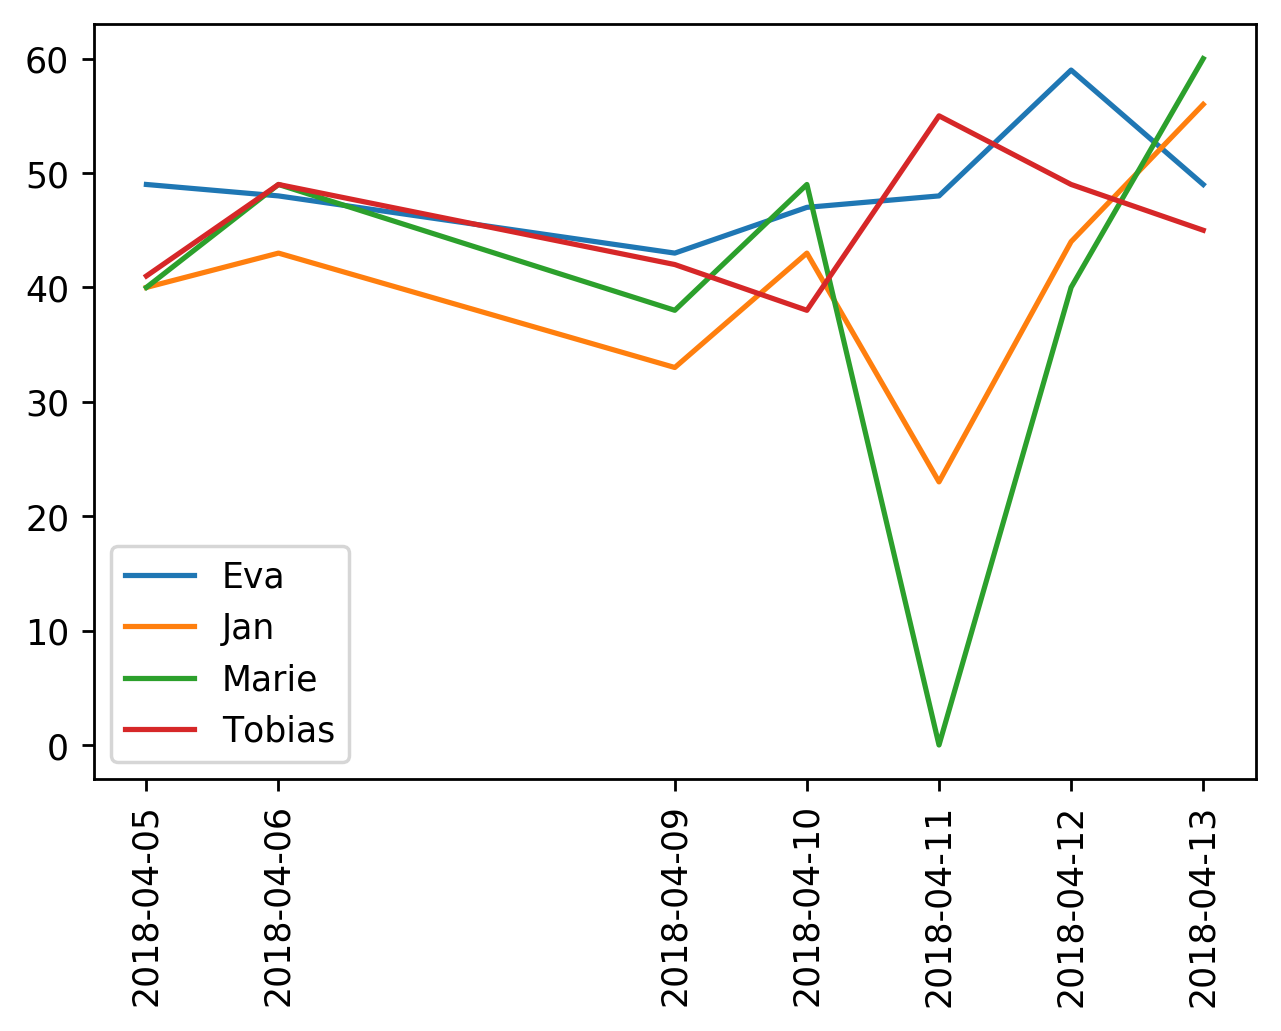

In [10]:
import ipywidgets as widgets
from IPython.display import display, clear_output


cbs = {}
for filename, df in dfs.items():
    cb = widgets.Checkbox(
        value=True,
        description=filename[:-5]
    )
    
    cbs[filename] = cb
    
    display(cb)
    
type_selector = widgets.RadioButtons(
    options=["calls", "sales"],
    value ="calls",
    description="Type"
)
display(type_selector)    
    
button = widgets.Button(description="Aktualisieren")
display(button)

def run_plot(filenames,type_v):
    for filename, df in dfs.items():
        if filename in filenames:
            cb = widgets.Checkbox(
                value=True,
                description=filename[:-5]
            )
        else:
            cb = widgets.Checkbox(
                value=False,
                description=filename[:-5]
            )

        cbs[filename] = cb

        display(cb)
    
    display(type_selector)
    
    display(button)
    
    fig, ax = plt.subplots()
    fig.dpi = 250
    
    x = [excel_date for excel_date, values in sorted(d.items())]
    
    for filename in filenames:
        y=[]
        for excel_date, values in sorted(d.items()):
            calls=0
            if filename in values:
                calls = values[filename][type_v]
            y.append(calls)
            
        ax.plot(x,y, label=filename[:-5])

    ax.legend()
    ax.set_xticks(x)
    ax.set_xticklabels(x, rotation=90)
    
    plt.show()

def on_button_click(s):
    clear_output()
    
    filenames=[]
    for filename, df in dfs.items():
        if cbs[filename].value:
            filenames.append(filename)
            
    run_plot(filenames,type_selector.value)
    
button.on_click(on_button_click)